In [1]:
# import pakcages and libraries needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
from keras.models import Sequential
from keras.layers import Dense

from keras.metrics import RootMeanSquaredError

from sklearn.preprocessing import scale

In [3]:
df = pd.read_csv('/content/framingham_clean_1.csv')
df.head()

,gender,age,education,current_smoker,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,tot_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,tenyearchd
0,1,39,4,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3,1,30.0,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3,1,23.0,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Scaling for making close variables values from each other
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# choose index for only scaling numerical data
index = np.r_[1,4,9:15]
df.iloc[:, index] = scaler.fit_transform(df.iloc[:, index]) # apply fit() on X_train and transform fit on X_train 

In [5]:
print(df.iloc[0,:])

gender              1.000000
age                -1.234951
education           4.000000
current_smoker      0.000000
cigs_per_day       -0.763194
bp_meds             0.000000
prevalent_stroke    0.000000
prevalent_hyp       0.000000
diabetes            0.000000
tot_chol           -0.974747
sys_bp             -1.255196
dia_bp             -1.118089
bmi                 0.330699
heart_rate          0.365617
glucose            -0.245553
tenyearchd          0.000000
Name: 0, dtype: float64


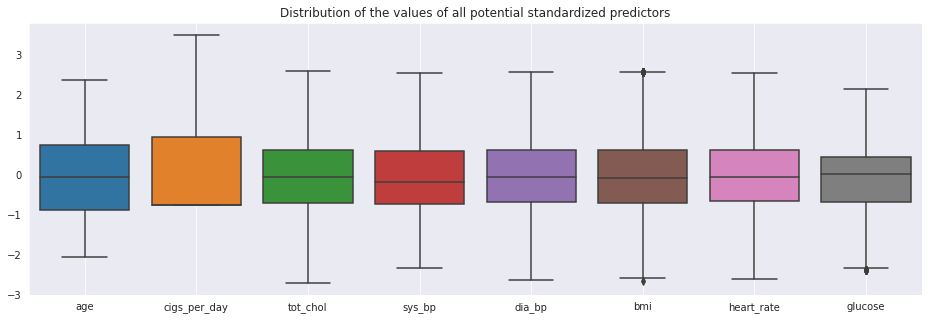

In [6]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df.iloc[:,index])
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

In [7]:
# independant and dependant variables
X = df.iloc[:,:-1].values # independent variables
y = df.iloc[:,-1].values # dependent variable

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 68)

In [9]:
# Check whether the dataset is equally splitted or no
from collections import Counter
Counter(y_train)

Counter({0: 2853, 1: 537})

In [10]:
model = Sequential()

# model.add(Dense(2046, activation='relu', input_shape=(15,)))
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(64, activation='relu'))
# Output Layer
model.add(Dense(1, activation='sigmoid',  input_shape=(15,)))

In [11]:
from tensorflow.keras import optimizers

RMS = optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop"
    )

adam = optimizers.Adam(
    learning_rate=0.002, 
    beta_1=0.9, 
    beta_2=0.999, 
    epsilon=1e-07, 
    decay=0.0,
    name="adam"
    )

lr_schedule = optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
sgd = optimizers.SGD(learning_rate=lr_schedule, name ='sgd')

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [13]:
results = model.fit(
    x = X_train,
    y = y_train,
    shuffle = True,
    epochs = 100,
    batch_size =32,
    validation_data = (X_test, y_test)
)

Epoch 1/100
106/106 [==============================] - 3s 10ms/step - loss: 0.9402 - binary_accuracy: 0.4363 - val_loss: 0.8596 - val_binary_accuracy: 0.4788
Epoch 2/100
106/106 [==============================] - 1s 7ms/step - loss: 0.7672 - binary_accuracy: 0.5416 - val_loss: 0.7022 - val_binary_accuracy: 0.5837
Epoch 3/100
106/106 [==============================] - 1s 8ms/step - loss: 0.6452 - binary_accuracy: 0.6522 - val_loss: 0.5936 - val_binary_accuracy: 0.7052
Epoch 4/100
106/106 [==============================] - 1s 6ms/step - loss: 0.5651 - binary_accuracy: 0.7298 - val_loss: 0.5215 - val_binary_accuracy: 0.7866
Epoch 5/100
106/106 [==============================] - 1s 6ms/step - loss: 0.5148 - binary_accuracy: 0.7829 - val_loss: 0.4746 - val_binary_accuracy: 0.8325
Epoch 6/100
106/106 [==============================] - 1s 6ms/step - loss: 0.4837 - binary_accuracy: 0.8133 - val_loss: 0.4438 - val_binary_accuracy: 0.8514
Epoch 7/100
106/106 [==============================] - 1s

In [14]:
score = model.evaluate(x= X_test, y=y_test, verbose = 0)
print('Test mse: ', score[0])
print('Test rmse: ', score[1])

Test mse:  0.3342866003513336
Test rmse:  0.8761792182922363


Text(0, 0.5, 'Losses')

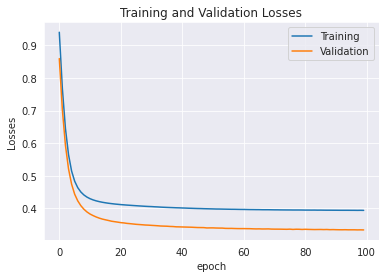

In [15]:
import matplotlib.pyplot as plt

plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoch')
plt.ylabel('Losses')

Text(0, 0.5, 'accuracy')

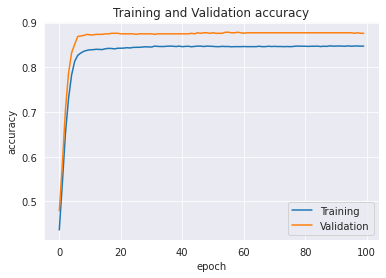

In [16]:
plt.plot(results.history['binary_accuracy'])
plt.plot(results.history['val_binary_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [17]:
prediction = model.predict(X_test)
print(prediction.flatten())
print(y_test)

[0.29559332 0.09330831 0.35735372 0.06040332 0.33204255 0.05510103
 0.21746498 0.06106108 0.16396429 0.05694715 0.11050439 0.14571384
 0.10247176 0.15599458 0.11370032 0.04610379 0.03603145 0.1207485
 0.03416664 0.39028418 0.23089059 0.37298566 0.28948167 0.07884178
 0.22089301 0.19638595 0.1517219  0.17842288 0.23864809 0.12152859
 0.17998858 0.15524574 0.04870597 0.03335159 0.30190322 0.15165393
 0.09181947 0.223796   0.05342387 0.07438327 0.22529222 0.15875043
 0.13713823 0.10644328 0.18881062 0.04759799 0.19492283 0.02908619
 0.06760059 0.09839512 0.10775831 0.1624714  0.04878636 0.05678841
 0.29855737 0.1034652  0.3246644  0.30098274 0.17593734 0.32146108
 0.19836737 0.05749548 0.31440908 0.04965593 0.17068341 0.10943075
 0.06938468 0.3064151  0.05910818 0.34359246 0.12799399 0.07343645
 0.1995463  0.08700875 0.09317036 0.11894529 0.20430365 0.17483932
 0.05096247 0.11181287 0.34331515 0.2023357  0.6394508  0.26822472
 0.21207307 0.15503047 0.20209137 0.1725866  0.11187255 0.14015

In [18]:
model.save('chd_10_years_risk_NN.h5')